In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

**Get all survey data for CA, GA, NY, FL**

In [2]:
survey = pd.read_csv(r'C:\Users\james\OneDrive\Desktop\James\Grad School\Georgia Tech\00 Program Prep\05 Miscellaneous\C3.ai\python\C3AI_COVID_GC-main\data\survey\survey_by_state.csv')

In [3]:
len(survey)

9770

In [4]:
survey.head()

,id,annualHouseholdIncome,birthYear2020,coronavirusConcern,coronavirusEmployment,coronavirusIntent_Mask,coronavirusIntent_SixFeet,coronavirusIntent_StayHome,coronavirusIntent_WashHands,coronavirusLocalCommunity,...,elderlyMoreRisk,coronaAllHospitalize,coronaKillsMost,ethnicitySpreadsCovid,allSpreadCovid,nonNativesSpreadCovid,asymptomaticSpread,onlySickSpread,infectFromAnimal,location.id
0,0007b4a0940ec892c58c0d875a305462,35000.0,1996,10.0,now-full,100.0,100,100,100,1.0,...,True,True,False,False,True,False,False,True,True,Georgia_UnitedStates
1,0014fa29afed18b4c3533df6d3fe3893,199999.0,1978,7.8,"was-jobless, now-jobless",88.0,88,83,87,1.0,...,True,True,False,False,True,False,True,False,False,California_UnitedStates
2,00230c4625bf3a2d91fec260b03295a4,20000.0,2001,2.8,"was-full, now-jobless",43.0,47,51,62,0.0,...,True,True,False,False,True,False,True,False,False,Florida_UnitedStates
3,003304aab00f9984ce56b2a7cdf9ebb7,NaN,1983,5.1,"was-full, now-full",48.0,98,45,100,0.0,...,False,False,False,False,True,False,True,True,True,California_UnitedStates
4,0034443f787fa7208f90d6e88fb8f003,60000.0,1977,7.8,now-full,100.0,100,100,100,0.0,...,True,True,True,False,True,False,True,False,False,NewYork_UnitedStates


In [5]:
survey.dtypes

id                              object
annualHouseholdIncome          float64
birthYear2020                    int64
coronavirusConcern             float64
coronavirusEmployment           object
coronavirusIntent_Mask         float64
coronavirusIntent_SixFeet        int64
coronavirusIntent_StayHome       int64
coronavirusIntent_WashHands      int64
coronavirusLocalCommunity      float64
coronavirusSupportSystem        object
coronavirusSymptoms             object
ratioOfAdultHospitalization     object
coronavirusWhenShouldReopen     object
education                       object
ethnicity                       object
gender                          object
hasCoronavirusBelief           float64
politicalBelief                float64
politicalParty                 float64
religion                        object
religiosity                    float64
trumpApproval                  float64
zipcodePrefix                    int64
startTime                       object
coronaSimilarFlu         

**Check missing data**

In [6]:
survey.isnull().any()

id                             False
annualHouseholdIncome           True
birthYear2020                  False
coronavirusConcern             False
coronavirusEmployment          False
coronavirusIntent_Mask          True
coronavirusIntent_SixFeet      False
coronavirusIntent_StayHome     False
coronavirusIntent_WashHands    False
coronavirusLocalCommunity       True
coronavirusSupportSystem       False
coronavirusSymptoms            False
ratioOfAdultHospitalization    False
coronavirusWhenShouldReopen    False
education                      False
ethnicity                      False
gender                         False
hasCoronavirusBelief           False
politicalBelief                False
politicalParty                 False
religion                       False
religiosity                    False
trumpApproval                  False
zipcodePrefix                  False
startTime                      False
coronaSimilarFlu               False
coronaOnlyElderly              False
y

In [7]:
sum(survey.isnull().any(axis=1))

4838

In [8]:
for col in ['annualHouseholdIncome','coronavirusIntent_Mask','coronavirusLocalCommunity']:
    print(col,': ',sum(survey[col].isnull()))

annualHouseholdIncome :  4126
coronavirusIntent_Mask :  1191
coronavirusLocalCommunity :  79


In [9]:
for col in survey.columns:
    print(col, survey[col].unique())

id ['0007b4a0940ec892c58c0d875a305462' '0014fa29afed18b4c3533df6d3fe3893'
 '00230c4625bf3a2d91fec260b03295a4' ... 'ffec217da4b1192705dd9483ffc8dd38'
 'ffed4d463614e652535c704dff7129e4' 'fff2d334714fdbcbb61fb1a55e57db2a']
annualHouseholdIncome [3.50000000e+04 1.99999000e+05 2.00000000e+04            nan
 6.00000000e+04 5.00000000e+04 5.80000000e+01 9.00000000e+03
 1.22356556e+08 5.60000000e+04 1.50000000e+05 1.00000000e+02
 3.80000000e+04 3.00000000e+04 2.00000000e+05 6.00000000e+02
 1.50000000e+04 1.22000000e+05 4.00000000e+04 4.90000000e+04
 8.55000000e+03 2.05000000e+05 8.00000000e+04 1.30000000e+03
 1.60000000e+05 2.20000000e+04 3.30000000e+04 1.25000000e+05
 1.00000000e+03 3.33333330e+07 5.90000000e+04 1.00000000e+04
 7.00000000e+03 7.20000000e+04 3.63000000e+04 5.80000000e+04
 2.70000000e+04 8.28189200e+06 4.50000000e+04 1.00000000e+09
 1.20000000e+05 9.50000000e+04 1.20000000e+01 2.50000000e+04
 5.50000000e+04 1.00500000e+03 0.00000000e+00 1.00000000e+05
 1.40000000e+04 7.5000000

In [10]:
# Drop the following columns:

# annualHouseholdIncome as it has too many missing data points
# id, birthYear2020, ethnicity, gender, religion, religiosity, education, zipcodePrefix,
# coronavirusEmployment, coronavirusSupportSystem, coronavirusSymptoms (too many designations)
# coronavirusLocalCommunity (70%+ has 0 then range of remaining values is too high)
# ratioOfAdultHospitalization (should be fact-based), coronavirusWhenShouldReopen (shouldn't be useful for predictions)
# hasCoronavirusBelief (too ambiguous)

In [11]:
cols_to_drop = ['id','annualHouseholdIncome','birthYear2020','ethnicity','gender','religion','religiosity','education', \
                'zipcodePrefix','coronavirusEmployment','coronavirusSupportSystem','coronavirusSymptoms', \
                'coronavirusLocalCommunity','ratioOfAdultHospitalization','coronavirusWhenShouldReopen','hasCoronavirusBelief']

survey = survey.drop(columns=cols_to_drop)

**Modify remaining columns**

In [12]:
survey['month'] = pd.to_datetime(survey['startTime']).dt.month
survey = survey.drop(columns='startTime')

In [13]:
survey.head()

,coronavirusConcern,coronavirusIntent_Mask,coronavirusIntent_SixFeet,coronavirusIntent_StayHome,coronavirusIntent_WashHands,politicalBelief,politicalParty,trumpApproval,coronaSimilarFlu,coronaOnlyElderly,...,coronaAllHospitalize,coronaKillsMost,ethnicitySpreadsCovid,allSpreadCovid,nonNativesSpreadCovid,asymptomaticSpread,onlySickSpread,infectFromAnimal,location.id,month
0,10.0,100.0,100,100,100,5.2,0.0,0.0,True,False,...,True,False,False,True,False,False,True,True,Georgia_UnitedStates,5
1,7.8,88.0,88,83,87,8.7,9.2,6.1,False,False,...,True,False,False,True,False,True,False,False,California_UnitedStates,6
2,2.8,43.0,47,51,62,0.0,5.0,5.1,False,False,...,True,False,False,True,False,True,False,False,Florida_UnitedStates,6
3,5.1,48.0,98,45,100,4.7,5.6,4.6,False,False,...,False,False,False,True,False,True,True,True,California_UnitedStates,5
4,7.8,100.0,100,100,100,5.0,5.0,0.0,False,False,...,True,True,False,True,False,True,False,False,NewYork_UnitedStates,4


**Check for correlated variables**

In [14]:
corrdf = survey.groupby(['location.id'], as_index=False).mean().corr()

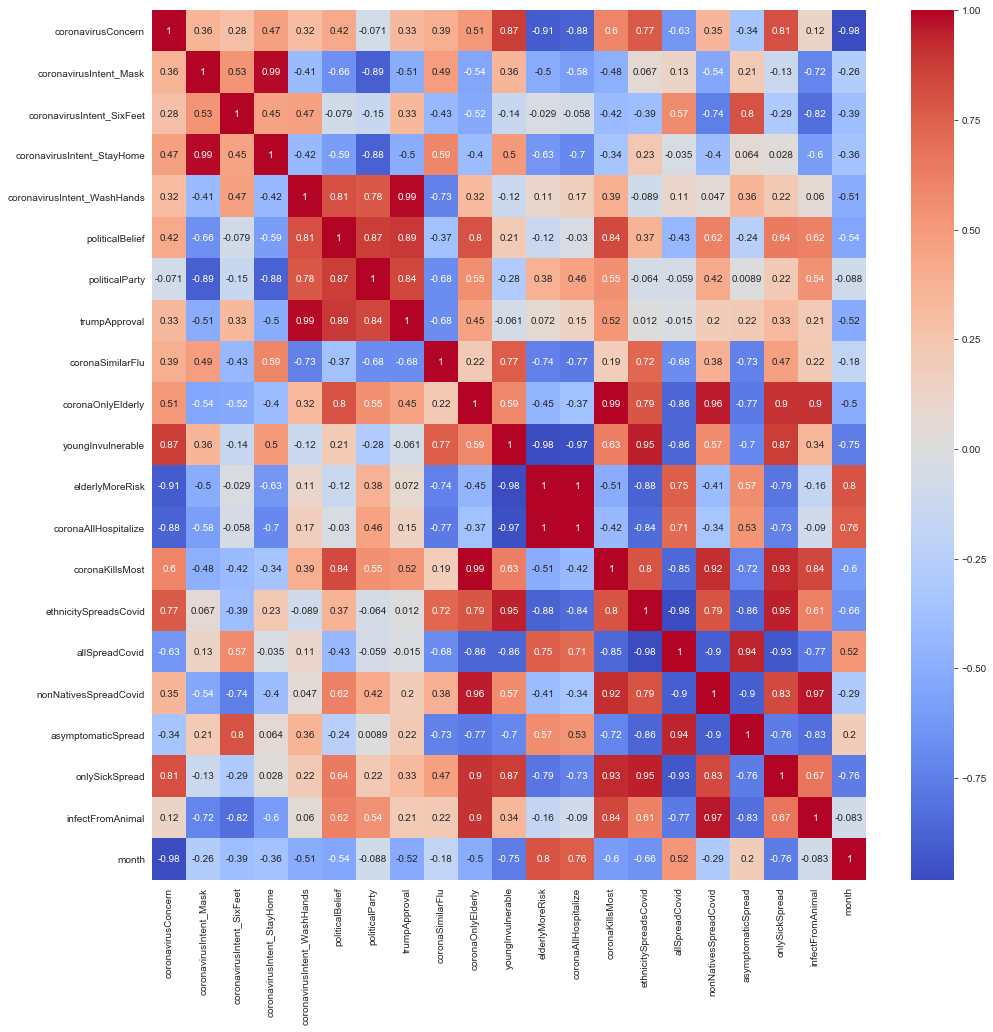

In [15]:
plt.figure(figsize=(16, 16))
sns.heatmap(corrdf, annot=True, cmap='coolwarm')

In [16]:
# For the most part, boolean variables are correlated -> remove the boolean variables
# We also remove coronavirusIntent_StayHome as it is almost perfectly correlated to Mask and seems redundant to SixFeet
# Retain just politicalBelief (seems least correlated to remaining factors)
    # Seems this is positively correlated to trumpApproval, values may be <-Democrat---------Republican->

In [17]:
survey.columns

Index(['coronavirusConcern', 'coronavirusIntent_Mask',
       'coronavirusIntent_SixFeet', 'coronavirusIntent_StayHome',
       'coronavirusIntent_WashHands', 'politicalBelief', 'politicalParty',
       'trumpApproval', 'coronaSimilarFlu', 'coronaOnlyElderly',
       'youngInvulnerable', 'elderlyMoreRisk', 'coronaAllHospitalize',
       'coronaKillsMost', 'ethnicitySpreadsCovid', 'allSpreadCovid',
       'nonNativesSpreadCovid', 'asymptomaticSpread', 'onlySickSpread',
       'infectFromAnimal', 'location.id', 'month'],
      dtype='object')

In [18]:
final_cols = ['coronavirusConcern','coronavirusIntent_Mask','coronavirusIntent_SixFeet','coronavirusIntent_WashHands', \
              'politicalBelief','location.id','month']
survey = survey[final_cols]

In [19]:
survey_mean = survey.groupby(['location.id', 'month'], as_index=False).mean()
survey_mean

,location.id,month,coronavirusConcern,coronavirusIntent_Mask,coronavirusIntent_SixFeet,coronavirusIntent_WashHands,politicalBelief
0,California_UnitedStates,4,6.856289,77.786885,78.338144,78.958763,5.021031
1,California_UnitedStates,5,6.756220,79.098086,79.082137,77.367624,4.890431
2,California_UnitedStates,6,6.431940,78.794905,77.922926,77.862835,4.868844
3,Florida_UnitedStates,4,6.783291,81.691358,80.888608,80.675949,5.274177
4,Florida_UnitedStates,5,7.023359,75.200772,79.934363,79.384170,5.324035
5,Florida_UnitedStates,6,6.469913,73.905217,78.271304,78.673043,5.073217
6,Georgia_UnitedStates,4,7.366245,81.268293,79.742616,79.983122,5.377215
7,Georgia_UnitedStates,5,7.039130,73.536862,79.022684,78.642722,5.344423
8,Georgia_UnitedStates,6,6.549843,71.254717,76.268868,78.193396,5.184277
9,NewYork_UnitedStates,4,7.545966,80.989011,80.574572,81.359413,5.509291


In [20]:
# Export file
survey_mean.to_csv(r'SurveyMean_CA_FL_GA_NY.csv', index = False)

**Check count to validate means**

In [21]:
survey.groupby(['location.id', 'month'], as_index=False).count()

,location.id,month,coronavirusConcern,coronavirusIntent_Mask,coronavirusIntent_SixFeet,coronavirusIntent_WashHands,politicalBelief
0,California_UnitedStates,4,485,122,485,485,485
1,California_UnitedStates,5,1254,1254,1254,1254,1254
2,California_UnitedStates,6,1531,1531,1531,1531,1531
3,Florida_UnitedStates,4,395,81,395,395,395
4,Florida_UnitedStates,5,1036,1036,1036,1036,1036
5,Florida_UnitedStates,6,1150,1150,1150,1150,1150
6,Georgia_UnitedStates,4,237,41,237,237,237
7,Georgia_UnitedStates,5,529,529,529,529,529
8,Georgia_UnitedStates,6,636,636,636,636,636
9,NewYork_UnitedStates,4,409,91,409,409,409


In [22]:
# Seems better to exclude missing values in calculating mean instead of imputing 0

**Check range of values of statistics**

In [23]:
survey_stats = []

for col in survey.columns[:-2]:
    survey_stats.append([col, survey[col].min()*1, survey[col].mean(), survey[col].max()*1])
    
survey_stats = pd.DataFrame(survey_stats, columns=['metric','min','mean','max'])
survey_stats

,metric,min,mean,max
0,coronavirusConcern,0.0,6.802805,10.0
1,coronavirusIntent_Mask,0.0,77.821658,100.0
2,coronavirusIntent_SixFeet,0.0,78.823644,100.0
3,coronavirusIntent_WashHands,0.0,78.531730,100.0
4,politicalBelief,0.0,5.085046,10.0
